# Homework 5

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
# adding path of smithplot
sys.path.append(os.path.join(os.getcwd(),"smithplot"))
from smithplot import SmithAxes


# # Making some test data
# thetas = np.linspace(0,2*np.pi,100)
# S = 0.316*np.exp(1j*thetas)


# Part A
 Given $ I_{dss} = 1A, V_{dss} = V_{br} = 40 V, C_{ds} = 0.6 pF$ and $L_{d} = 0.6 nH $
 
 We can calculate $R_{opt}$ as:
 
 $R_{opt} = \frac{40}{1/2} = 80 \Omega $
 
 Since we know that:
 
 $\frac{P_{RF}}{P_{RF,max}} = \frac{R_{L,lo}}{R_{opt}}$
 
 We can say that:
 
 $ \frac{P_{RF}}{P_{RF,max}} R_{opt} = R_{L,lo} = 10^{-0.2} 80 = \boxed{50.476\Omega } $
 
 Similarly:
 
 $ R_{L,hi} = \frac1{R_{L,lo}} $

# Constructing the plot
 Now that we have our $R_{lo}$, we can find all of the impedances corresponding to the
 -2 dB contour by drawing the "football" corresponding to all impedances of
 the form  $Z = R_{L,lo} + jX$ on the left and $ Y = \frac1{R_{L,lo}} + jB $ on the left (before they
 intercept each other).
 
 This can easily be done and then plotted once you have the two points where these lines intersect.

 I found that this point has the reactance $ X = \sqrt{R_{opt}^2-R_{L,lo}^2} $

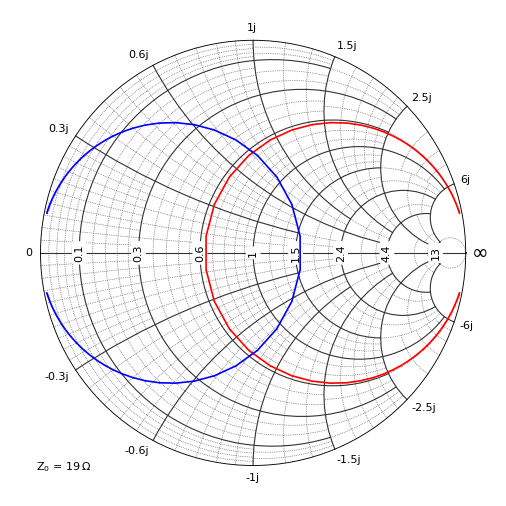

In [15]:
fig=plt.figure(figsize=(10, 8), dpi= 80)
R_L_opt = 19.28
ax = plt.subplot(1,1,1,projection='smith',axes_impedance= R_L_opt)
attenuation =2 #dB 

R = 10**(-attenuation/10)*19.28          # Lower resistance which gives the desired attenuation 
X = 200                                  # Plotting a large sweep of these impedances
ctr_left = R + 1j*np.linspace(-X,X,100)  # Broadcasts to sweep
ctr_right = R_L_opt**2/ctr_left          # flippy dippy

plt.plot(ctr_left,datatype=SmithAxes.Z_PARAMETER,markersize=0.2,color='r')
plt.plot(ctr_right,datatype=SmithAxes.Z_PARAMETER,markersize=0.2,color='b')
plt.show()

## Plotting -2 dB Contours $Z_0 = R_{opt} $

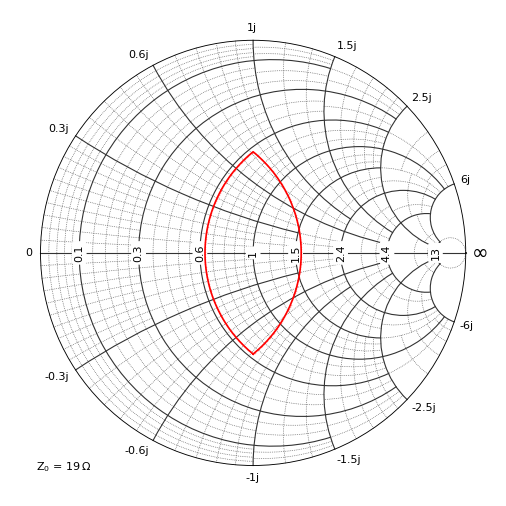

In [16]:
fig=plt.figure(figsize=(10, 8), dpi= 80)

# Plot the Cripps contour for Z0 = R_L_opt Ω
Z0 = R_L_opt
ax = plt.subplot(1,1,1,projection='smith',axes_impedance=Z0)
# R = 50.476                                   # Lower resistance which gives the desired attenuation, must be < Z0
X = np.sqrt(R_L_opt**2-R**2)                 # Result shown in previous cell
ctr_left = R + 1j*np.linspace(-X,X,100)      # Broadcasts to sweep
ctr_right = R_L_opt**2/ctr_left              # flippy dippy
ctr = np.concatenate((ctr_left,ctr_right))

plt.plot(ctr,datatype=SmithAxes.Z_PARAMETER,markersize=0.2,color='r')
plt.show()


## Plotting -2dB Contours $Z_0 = 50 \Omega $

19.28


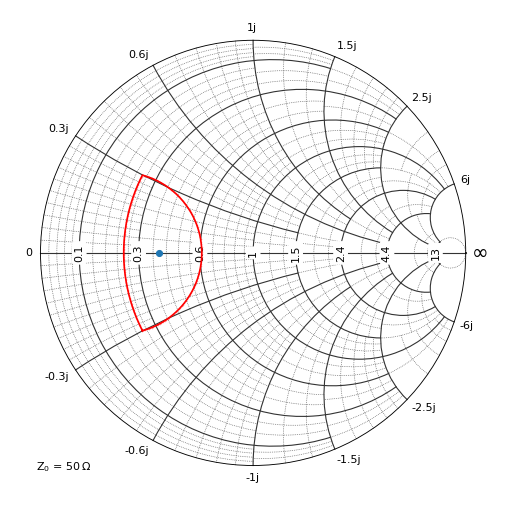

In [30]:
fig=plt.figure(figsize=(10, 8), dpi= 80)

# Plot the Cripps contour given a resistance for Z0 = 50 Ω
ax = plt.subplot(1,1,1,projection='smith',axes_impedance=50)
Z_opt = np.array([R_L_opt],dtype=complex)

print(R_L_opt)
plt.plot(ctr,datatype=SmithAxes.Z_PARAMETER,markersize=0.2,color='r')
plt.plot(Z_opt,'o',datatype=SmithAxes.Z_PARAMETER)
plt.show()

# Part B
 Now, we need to account for the parasitics of the device. We have found the proper
 impedances to present to the drain, but the parasitics of the device are first applied
 before whatever impedance at the outside of the package is presented to the drain.
 So, we first need to de-embed a shunt capacitance of $ C_{ds} = 0.6$ and a series inductance
 of $L_{d} = 0.6 $.  This is relatively simple, we simply subtract the admittance of the capacitor
 from the traces expressed as admittances, and similarly subtract the impedance of the inductor from
 the impedance of the traces.
 De-embedding the shunt capacitor

[16.8294438+6.42195436j]


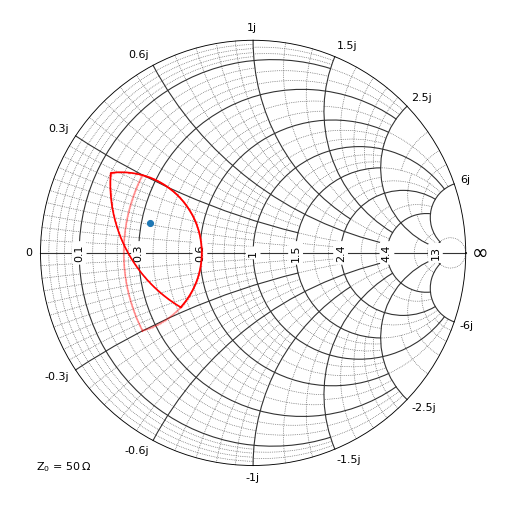

In [33]:
fig=plt.figure(figsize=(10, 8), dpi= 80)

ax = plt.subplot(1,1,1,projection='smith',axes_impedance=50)

# Our contour is in the impedance domain, so we must convert it to an admittance
ctr_y = 1/ctr

# Calculating the admittance of the capacitor
f = 5e9
C = 1.26e-12 #pF
cap_y = 1j*np.pi*f*C
ctr_y -= cap_y            # subtracting the impedance of the capacitor
ctr_after_cap = 1/ctr_y   # transforming back into impedance

Y_opt = 1/Z_opt
Y_opt -= cap_y
Z_opt_after_cap = 1/Y_opt
#old contour
plt.plot(ctr,datatype=SmithAxes.Z_PARAMETER,markersize=0.2,color='r',alpha= .4)
# with capacitor de-embedded
plt.plot(ctr_after_cap,datatype=SmithAxes.Z_PARAMETER,markersize=0.2,color='r')
print(Z_opt_after_cap)
plt.plot(Z_opt_after_cap,'o',datatype=SmithAxes.Z_PARAMETER)

plt.show()


## Plotting -2dB Contours With $L_d$ and $C_{ds}$ de-embedded

[16.8294438-1.43202727j]


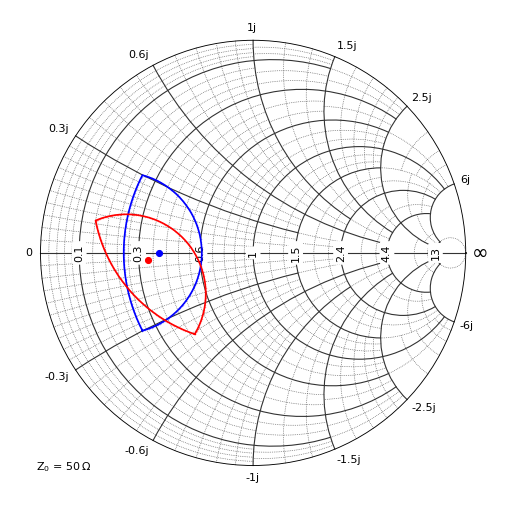

In [37]:
fig=plt.figure(figsize=(10, 8), dpi= 80)

ax = plt.subplot(1,1,1,projection='smith',axes_impedance=50)

# Calculating the impedance of capacitor
f = 5e9
L = 0.5e-9 # nH
ind_z = 1j*f*np.pi*L
ctr_external_plane = ctr_after_cap - ind_z

#old contour
plt.plot(ctr,datatype=SmithAxes.Z_PARAMETER,markersize=0.2,color='b')
plt.plot(Z_opt,'o',datatype=SmithAxes.Z_PARAMETER,color ='b')

# with capacitor de-embedded
plt.plot(ctr_external_plane,datatype=SmithAxes.Z_PARAMETER,markersize=0.2,color='r')
plt.plot(Z_opt_after_cap-ind_z,'o',datatype=SmithAxes.Z_PARAMETER,color ='r')
print(Z_opt_after_cap-ind_z)
plt.show()